In [13]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use('seaborn')
from tqdm import tqdm

from orbit.models.dlt import ETSFull, DLTFull

In [14]:
df = pd.read_csv('../data/summer.csv', index_col=0, parse_dates=['time'], dayfirst=True)
df.head()

,time,price
0,2021-06-01 04:00:00+00:00,125.00
1,2021-06-01 04:15:00+00:00,125.17
2,2021-06-01 04:30:00+00:00,125.20
3,2021-06-01 04:45:00+00:00,125.30
4,2021-06-01 05:00:00+00:00,125.38


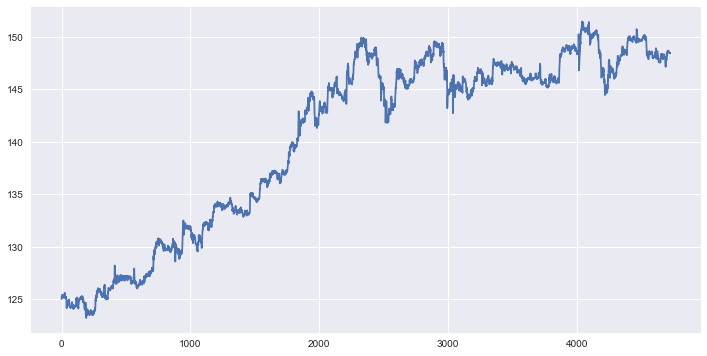

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['price'])
plt.show()

In [17]:
test_size = 74
train = df[:-test_size]
test = df[-test_size:]
train.dtypes

time     datetime64[ns, UTC]
price                float64
dtype: object

In [18]:
ets = ETSFull(
    response_col='price',
    date_col='time',
    seasonality=52,
    seed=8888,
)

In [20]:
%%time
train['time'] = pd.to_numeric(train['time'])
ets.fit(train)

C:\Users\spark\.conda\envs\stan_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Wall time: 43.1 s


In [22]:
test['time'] = pd.to_numeric(test['time'])
predicted_df = ets.predict(test)

C:\Users\spark\.conda\envs\stan_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
predicted_df['time'] = pd.to_datetime(predicted_df['time'])
test['time'] = pd.to_datetime(test['time'])
predicted_df.head()

C:\Users\spark\.conda\envs\stan_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,time,prediction_5,prediction,prediction_95
0,2021-08-27 04:15:00,147.482678,148.024020,148.500630
1,2021-08-27 04:30:00,147.415495,147.996457,148.564855
2,2021-08-27 04:45:00,147.403894,148.010470,148.836299
3,2021-08-27 05:00:00,147.183903,147.807078,148.773013
4,2021-08-27 05:15:00,147.013164,147.789013,148.743325


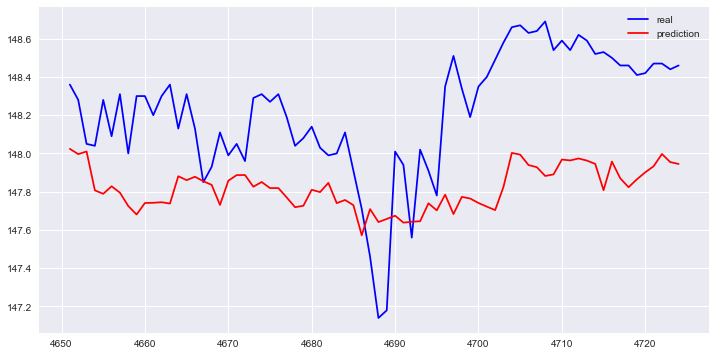

In [28]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(test.index, test['price'], c='b', label='real')
ax.plot(test.index, predicted_df['prediction'], c='r', label='prediction')
plt.legend()
plt.show()

In [30]:
test.to_csv('../data/test.csv')

In [37]:
pred = pd.DataFrame(predicted_df[['time', 'prediction']])
pred.head()

,time,prediction
0,2021-08-27 04:15:00,148.024020
1,2021-08-27 04:30:00,147.996457
2,2021-08-27 04:45:00,148.010470
3,2021-08-27 05:00:00,147.807078
4,2021-08-27 05:15:00,147.789013


In [38]:
pred.to_csv('../data/pred.csv')